In [3]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

style.use('ggplot')

In [4]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

In [5]:
df = web.DataReader('TSLA', 'yahoo', start, end)

In [6]:
print(df)

                  High         Low        Open       Close    Volume  \
Date                                                                   
2010-06-29   25.000000   17.540001   19.000000   23.889999  18766300   
2010-06-30   30.420000   23.299999   25.790001   23.830000  17187100   
2010-07-01   25.920000   20.270000   25.000000   21.959999   8218800   
2010-07-02   23.100000   18.709999   23.000000   19.200001   5139800   
2010-07-06   20.000000   15.830000   20.000000   16.110001   6866900   
2010-07-07   16.629999   14.980000   16.400000   15.800000   6921700   
2010-07-08   17.520000   15.570000   16.139999   17.459999   7711400   
2010-07-09   17.900000   16.549999   17.580000   17.400000   4050600   
2010-07-12   18.070000   17.000000   17.950001   17.049999   2202500   
2010-07-13   18.639999   16.900000   17.389999   18.139999   2680100   
2010-07-14   20.150000   17.760000   17.940001   19.840000   4195200   
2010-07-15   21.500000   19.000000   19.940001   19.889999   373

In [8]:
# Used pandas_datareader to fetch data within date range from Yahoo finance according 

In [9]:
df.to_csv('tsla.csv')

In [16]:
# Read in csv file and use datetime as index

In [17]:
df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 0)

In [18]:
print(df.head())

             High        Low       Open      Close    Volume  Adj Close
Date                                                                   
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001


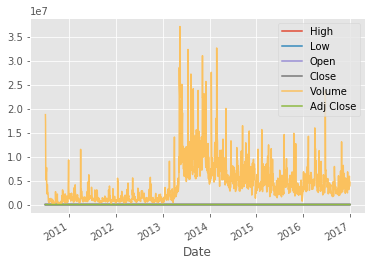

In [19]:
df.plot()

In [20]:
# Show specfic column

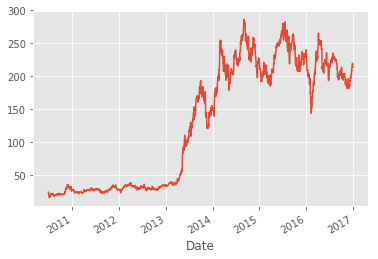

In [21]:
df['Adj Close'].plot()

In [22]:
# Graph multiple columns

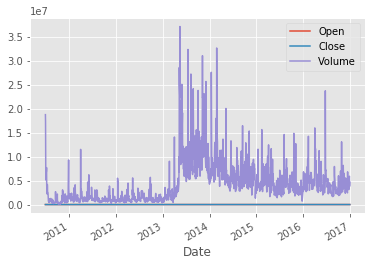

In [24]:
df[['Open', 'Close', 'Volume']].plot()

In [25]:
# Make a new column for moving average

In [34]:
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()

In [35]:
# Drop NA

In [36]:
df.dropna(inplace=True)

In [39]:
print(df.head())

                 High        Low       Open      Close   Volume  Adj Close  \
Date                                                                         
2010-11-17  30.750000  28.610001  30.200001  29.490000   750000  29.490000   
2010-11-18  30.740000  28.920000  30.670000  29.889999   956100  29.889999   
2010-11-19  31.370001  29.700001  30.160000  30.990000  1150500  30.990000   
2010-11-22  33.450001  31.500000  31.570000  33.400002  1529700  33.400002   
2010-11-23  35.680000  32.189999  33.290001  34.570000  1577800  34.570000   

                100ma  
Date                   
2010-11-17  29.490000  
2010-11-18  29.690000  
2010-11-19  30.123333  
2010-11-22  30.942500  
2010-11-23  31.668000  


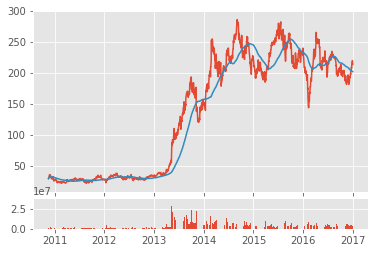

In [44]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])
plt.show()